In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Question 1
Find the minimum variance and tangency portfolios of the industries. (hint:  you will need to compute the means (arithmetic average), standard deviations, variances, and covariance matrix of the industries.  The risk-free rate is given in the spreadsheet.)  Comment on the different weights applied to each industry under the MVP and Tangent portfolios. 

#### a)	
Compute the means and standard deviations of the MVP and Tangent portfolios.  Plot the efficient frontier of these 10 industries and plot the 10 industries as well on a mean-standard deviation diagram.  Why does the efficient frontier exhibit the shape that it does (i.e., why is it a parabola)?

In [ ]:
#Import Excel Data
df = pd.read_csv("PS2.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y%m")
dfdt = df.set_index("date")
# rowLength = len(dfdt.index)

industryMean = []
industrySD = []

NoDur = dfdt['NoDur']
Durbl = dfdt['Durbl']
Manuf = dfdt['Manuf']
Enrgy = dfdt['Enrgy']
HiTec = dfdt['HiTec']
Telcm = dfdt['Telcm']
Shops = dfdt['Shops']
Hlth = dfdt['Hlth ']
Utils = dfdt['Utils']
Other = dfdt['Other']
Rf = dfdt['Risk-free rate']

industryReturns = dfdt.drop('Risk-free rate', axis = 1)
industryNames = industryReturns.columns.tolist()

# Find mean (R) and standard deviation (SD) for each industry, also mean for risk-free (Rf)
for name in industryNames:
    industryMean.append(sum(industryReturns[name]) / len(industryReturns[name]))
    industrySD.append(np.std(industryReturns[name], ddof = 1))

# Create matrix containing return of the industries (10 columns), create covariance matrix   
industryVar = np.square(industrySD)
industryCov = industryReturns.cov()
industryCovInv = np.linalg.pinv(industryCov.values)
ones = np.transpose([1]*len(industryNames))
onesT = np.transpose(ones)
# ?? shape of ones and onesT are the same, ask TA

# Calculate the portfolio weight for Minimum Variance Portfolio (MVP) with following:
weightMVP = np.matmul(industryCovInv, ones) / np.matmul(np.matmul(onesT, industryCovInv), ones)

# Calculate the MVP standard deviation by: w’*V*w and mean by: w’*R

MVP_Var = np.matmul(np.matmul(np.transpose(weightMVP), industryCov.to_numpy()), weightMVP)
MVP_SD = MVP_Var**(1/2)
MVP_Mean = np.matmul(np.transpose(weightMVP), np.array(industryMean))

# Calculate the portfolio weight for Tangency Portfolio with the following:
RfMean = sum(Rf) / len(Rf)
numerator = np.matmul(industryCovInv, np.transpose(industryMean - RfMean*ones))
denominator = np.matmul(np.matmul(onesT, industryCovInv), np.transpose(industryMean - RfMean*ones))
weightTangent = numerator / denominator

# Calculate the Tangency mean by: w_tang*R, and standard deviation by: w_tang’*V*w_tang
Tan_Var = np.matmul(np.matmul(np.transpose(weightTangent), industryCov.to_numpy()), weightTangent)
Tan_SD = Tan_Var**(1/2)
Tan_Mean = np.matmul(np.transpose(weightTangent), np.array(industryMean))

On the mean-standard deviation diagram, we now have two points for the efficient frontier, **(MVP_SD, MVP_Mean)** and **(Tan_SD, Tan_Mean)**. MVP is the vertex of this parabola, so mirror the Tangency point with MVP we get a 3rd point, **(Tan_SD, Tan_Mean - 2*(Tan_Mean - MVP_Mean))** and can create an efficient frontier. Specifically, we use these three points, exchange x and y axis and fit a parabola. Sample points $(x_1,y_1),...(x_{50},y_{50})$ from the parabola and plot the  $(y_1,x_1),...(y_{50},x_{50})$ which the vertex of the parabola is at MVP.

In [ ]:
df = pd.DataFrame({'x':[MVP_SD,Tan_SD, Tan_SD], 
                  'y':[MVP_Mean, Tan_Mean, Tan_Mean - 2*(Tan_Mean - MVP_Mean)]})
print(df)

fit = np.polyfit(df['y'], df['x'], 2)
equation = np.poly1d(fit)
print ("The fit coefficients are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit))
print (equation)

          x         y
0  3.724415  0.930786
1  4.061181  1.053411
2  4.061181  0.808161
The fit coefficients are a = 22.3959, b = -41.6917 c = 23.1274
      2
22.4 x - 41.69 x + 23.13


Next, we plot the industry mean against industry standard deviation with the efficient frontier and check if these points are within the efficient frontier.

(0.0, 2.0)

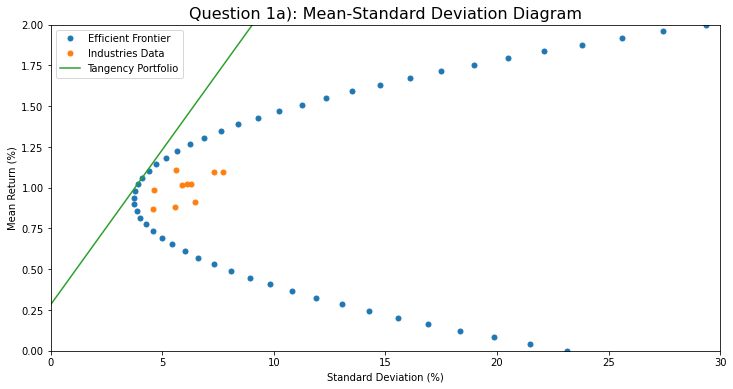

In [ ]:
#Create second point for Tangency Portfolio
tangencySlope = (Tan_Mean - RfMean) / Tan_SD
y = RfMean + tangencySlope*30
tangencyX = [0, 30]
tangencyY = [RfMean, y]

# Plot industry mean (R) against industry standard deviation (SD)
x = np.linspace(2,0,num=50)
y = 22.4 * x **2 - 41.69 * x + 23.13
fig=plt.figure(figsize=(12,6))
plt.plot(y,x,'.',markersize=10, label = 'Efficient Frontier')
plt.plot(industrySD,industryMean,'.',markersize=10, label = 'Industries Data')
plt.plot(tangencyX, tangencyY, label = 'Tangency Portfolio')
plt.plot()
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.title('Question 1a): Mean-Standard Deviation Diagram', fontsize=16)
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 2)

There are two reasons that the efficient frontier is a parabola. We derived in class mathematically that 
\begin{equation}
\sigma_{p}^{*2}=\frac{a-2 b r_{p}+c r_{p}^{2}}{a c-b^{2}}
\end{equation}
which includes a quadratic term and makes it a parabola. Another reason is that efficient frontier is a diminishing marginal return to risk. When the units of risk adding to the portfolio increases, the return decreases.

#### b)	
Comment on the reliability of the mean return estimates for each industry.  Then, artificially change the mean return estimates of each industry by a one standard error increase.  How much does the Tangent portfolio change?  Does the efficient frontier change a lot or a little?

Given the size of the dataset (90-year), the mean return estimates for each industy should be quite reliable. 

That being said, the results are quite sensitive to any change in the mean return value. Due to the large sample size, a change of one standard error to the mean return is only a ~0.5% difference. Yet, if we artificially change the mean return estiamtes of each industry by one standard error increase, at the Tangency point on the efficient frontier, the return is increased by ~12%, even though graphically Tangency portfolio doesn't seem to have changed too much. Additionally, graphically we can see that the efficient frontier change a lot. The vertex (MVP) of the frontier is moved up slightly, but the shape is widen.

Note that when conducting this exercise, we recreated the return data for each industry (original value + 1*standard error) and recalculated the covariance matrix. This turns out to have negligible impact on the final result, comparing to simply using the original covariance matrix.

         x2        y2
0  3.724415  0.930786
1  4.047465  1.181626
2  4.047465  0.679947
The fit coefficients for 1b) are a = 5.1343, b = -9.5578 c = 8.1725
       2
5.134 x - 9.558 x + 8.173


(0.0, 3.0)

<Figure size 432x288 with 0 Axes>

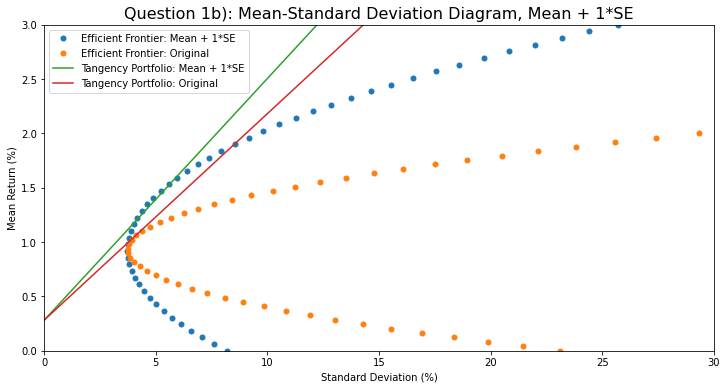

In [ ]:


size = len(NoDur)
industryMean2 = []
for i in range(0, len(industryMean)):
    industryMean2.append(industryMean[i] + industrySD[i] / (size**(1/2)))
industrySE = []
for i in range(0, len(industrySD)):
    industrySE.append(industrySD[i] / (size**1/2))

df = pd.read_csv("PS2_1SE.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y%m")
industryReturns2 = df.set_index("date")

industryCov2 = industryReturns2.cov()
industryCovInv2 = np.linalg.pinv(industryCov2.values)

# Calculate the NEW MVP weight:
weightMVP2 = np.matmul(industryCovInv2, ones) / np.matmul(np.matmul(onesT, industryCovInv2), ones)

# Calculate the NEW MVP standard deviation and mean:
MVP_Var2 = np.matmul(np.matmul(np.transpose(weightMVP2), industryCov2.to_numpy()), weightMVP2)
MVP_SD2 = MVP_Var2**(1/2)
MVP_Mean2 = np.matmul(np.transpose(weightMVP), np.array(industryMean))

# Calculate the portfolio weight for NEW Tangency Portfolio with the following:
RfMean2 = RfMean
numerator = np.matmul(industryCovInv2, np.transpose(industryMean2 - RfMean2*ones))
denominator = np.matmul(np.matmul(onesT, industryCovInv2), np.transpose(industryMean2 - RfMean2*ones))
weightTangent2 = numerator / denominator

# Calculate the NEW Tangency mean by: w_tang*R, and standard deviation by: w_tang’*V*w_tang
Tan_Var2 = np.matmul(np.matmul(np.transpose(weightTangent2), industryCov2.to_numpy()), weightTangent2)
Tan_SD2 = Tan_Var2**(1/2)
Tan_Mean2 = np.matmul(np.transpose(weightTangent2), np.array(industryMean2))

df2 = pd.DataFrame({'x2':[MVP_SD2,Tan_SD2, Tan_SD2], 
                  'y2':[MVP_Mean2, Tan_Mean2, Tan_Mean2 - 2*(Tan_Mean2 - MVP_Mean2)]})
print(df2)

fit2 = np.polyfit(df2['y2'], df2['x2'], 2)
equation2 = np.poly1d(fit2)
print ("The fit coefficients for 1b) are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit2))
print (equation2)

tangencySlope2 = (Tan_Mean2 - RfMean2) / Tan_SD2
y2ndpt2 = RfMean2 + tangencySlope2*30
tangencyX2 = [0, 30]
tangencyY2 = [RfMean2, y2ndpt2]

plt.figure()
x2 = np.linspace(0, 3,num=50)
y2 = 5.134 * x2 **2 - 9.558 * x2 + 8.173
fig=plt.figure(figsize=(12,6))
plt.plot(y2, x2, '.', markersize=10, label = 'Efficient Frontier: Mean + 1*SE')
plt.plot(y, x,'.',markersize=10, label = 'Efficient Frontier: Original')
plt.plot(tangencyX2, tangencyY2, label = 'Tangency Portfolio: Mean + 1*SE')
plt.plot(tangencyX, tangencyY, label = 'Tangency Portfolio: Original')
plt.plot()
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.title('Question 1b): Mean-Standard Deviation Diagram, Mean + 1*SE', fontsize=16)
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

#### c)	
Comment on the reliability of the covariance matrix estimate.  First, assume that all covariances are zero and recompute the efficient frontier using the diagonal matrix of variances as the covariance matrix.  Then, assume very simply that the covariance matrix is just the identity matrix (i.e., a matrix of ones along the diagonal and zeros everywhere else).  Does the mean-variance frontier change a lot or a little, relative to b)?  How important are the covariance terms relative to the variance terms?

Given the size of the dataset (90-year), the reliability of the covariance matrix estimate should be quite high, possibly even higher than that of the mean return estimate.

If we change the covanraince to diagonal matrix of variances (all covariance terms = 0) and identity matrix, the below graphs show that the efficient frontier changes, but to a smaller extent comparing to b).

Between the covariance terms and the variance terms, we can see from the two graphs that the variance terms seem to be more important, as the identity matrix graph still holds relatively the same efficient frontier shape (albeit moved slightly), while the variance matrix has moved the efficient frontier and changed the shape (narrower).

Note that the mean-standard deviation frontier is used to keep consistent with the previous parts, but the frontier shape will not change.


         x3        y3
0  1.830440  0.986281
1  1.843472  0.996345
2  1.843472  0.976218
The fit coefficients for 1c)-1 are a = 128.6762, b = -253.8219 c = 127.0003
       2
128.7 x - 253.8 x + 127
         x4        y4
0  0.316228  1.001583
1  0.318366  1.011346
2  0.318366  0.991819
The fit coefficients for 1c)-2 are a = 22.4302, b = -44.9315 c = 22.8175
       2
22.43 x - 44.93 x + 22.82


(0.0, 3.0)

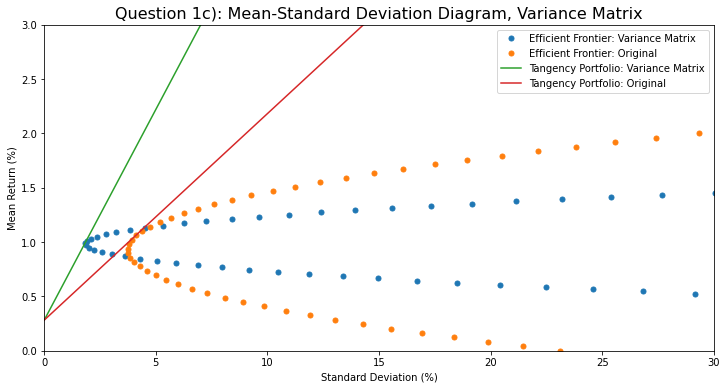

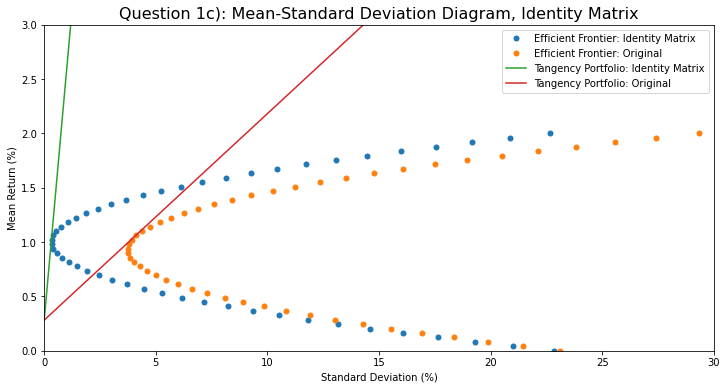

In [ ]:
#Create Covariance Matrix with only Variance in the diagonal
industryCov3 = industryCov
for name1 in industryNames:
    for name2 in industryNames:
        if name1 == name2:
            continue
        industryCov3[name1][name2] = 0
industryCovInv3 = np.linalg.pinv(industryCov3.values)

# Calculate the portfolio weight for Minimum Variance Portfolio (MVP) with following:
weightMVP3 = np.matmul(industryCovInv3, ones) / np.matmul(np.matmul(onesT, industryCovInv3), ones)

# Calculate the MVP standard deviation by: w’*V*w and mean by: w’*R, and 
MVP_Var3 = np.matmul(np.matmul(np.transpose(weightMVP3), industryCov3.to_numpy()), weightMVP3)
MVP_SD3 = MVP_Var3**(1/2)
MVP_Mean3 = np.matmul(np.transpose(weightMVP3), np.array(industryMean))

# Calculate the portfolio weight for Tangency Portfolio with the following:
numerator = np.matmul(industryCovInv3, np.transpose(industryMean - RfMean*ones))
denominator = np.matmul(np.matmul(onesT, industryCovInv3), np.transpose(industryMean - RfMean*ones))
weightTangent3 = numerator / denominator

# Calculate the Tangency mean by: w_tang*R, and standard deviation by: w_tang’*V*w_tang
Tan_Var3 = np.matmul(np.matmul(np.transpose(weightTangent3), industryCov3.to_numpy()), weightTangent3)
Tan_SD3 = Tan_Var3**(1/2)
Tan_Mean3 = np.matmul(np.transpose(weightTangent3), np.array(industryMean))

df3 = pd.DataFrame({'x3':[MVP_SD3,Tan_SD3, Tan_SD3], 
                  'y3':[MVP_Mean3, Tan_Mean3, Tan_Mean3 - 2*(Tan_Mean3 - MVP_Mean3)]})
print(df3)

fit3 = np.polyfit(df3['y3'], df3['x3'], 2)
equation3 = np.poly1d(fit3)
print ("The fit coefficients for 1c)-1 are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit3))
print (equation3)

#Create second point for Tangency Portfolio
tangencySlope3 = (Tan_Mean3 - RfMean) / Tan_SD3
y2ndpt3 = RfMean + tangencySlope3*30
tangencyX3 = [0, 30]
tangencyY3 = [RfMean, y2ndpt3]

# Plot industry mean (R) against industry standard deviation (SD)
x3 = np.linspace(2,0,num=100)
y3 = 128.676 * x3 **2 - 253.822 * x3 + 127
fig=plt.figure(figsize=(12,6))
plt.plot(y3, x3,'.',markersize=10, label = 'Efficient Frontier: Variance Matrix')
plt.plot(y, x,'.',markersize=10, label = 'Efficient Frontier: Original')
plt.plot(tangencyX3, tangencyY3, label = 'Tangency Portfolio: Variance Matrix')
plt.plot(tangencyX, tangencyY, label = 'Tangency Portfolio: Original')
plt.plot()
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.title('Question 1c): Mean-Standard Deviation Diagram, Variance Matrix', fontsize=16)
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

#Create Covariance Matrix with Identity Matrix
industryCov4 = industryCov3
for name1 in industryNames:
    for name2 in industryNames:
        if name1 == name2:
            industryCov4[name1][name2] = 1
industryCovInv4 = np.linalg.pinv(industryCov4.values)

# Calculate the portfolio weight for Minimum Variance Portfolio (MVP) with following:
weightMVP4 = np.matmul(industryCovInv4, ones) / np.matmul(np.matmul(onesT, industryCovInv4), ones)

# Calculate the MVP standard deviation by: w’*V*w and mean by: w’*R, and 
MVP_Var4 = np.matmul(np.matmul(np.transpose(weightMVP4), industryCov4.to_numpy()), weightMVP4)
MVP_SD4 = MVP_Var4**(1/2)
MVP_Mean4 = np.matmul(np.transpose(weightMVP4), np.array(industryMean))

# Calculate the portfolio weight for Tangency Portfolio with the following:
numerator = np.matmul(industryCovInv4, np.transpose(industryMean - RfMean*ones))
denominator = np.matmul(np.matmul(onesT, industryCovInv4), np.transpose(industryMean - RfMean*ones))
weightTangent4 = numerator / denominator

# Calculate the Tangency mean by: w_tang*R, and standard deviation by: w_tang’*V*w_tang
Tan_Var4 = np.matmul(np.matmul(np.transpose(weightTangent4), industryCov4.to_numpy()), weightTangent4)
Tan_SD4 = Tan_Var4**(1/2)
Tan_Mean4 = np.matmul(np.transpose(weightTangent4), np.array(industryMean))

df4 = pd.DataFrame({'x4':[MVP_SD4, Tan_SD4, Tan_SD4], 
                  'y4':[MVP_Mean4, Tan_Mean4, Tan_Mean4 - 2*(Tan_Mean4 - MVP_Mean4)]})
print(df4)

fit4 = np.polyfit(df4['y4'], df4['x4'], 2)
equation4 = np.poly1d(fit4)
print ("The fit coefficients for 1c)-2 are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit4))
print (equation4)

#Create second point for Tangency Portfolio
tangencySlope4 = (Tan_Mean4 - RfMean) / Tan_SD4
y2ndpt4 = RfMean + tangencySlope4*30
tangencyX4 = [0, 30]
tangencyY4 = [RfMean, y2ndpt4]

# Plot industry mean (R) against industry standard deviation (SD)
x4 = np.linspace(2,0,num=50)
y4 = 22.43 * x4 **2 - 44.93 * x4 + 22.82
fig=plt.figure(figsize=(12,6))
plt.plot(y4, x4,'.',markersize=10, label = 'Efficient Frontier: Identity Matrix')
plt.plot(y, x,'.',markersize=10, label = 'Efficient Frontier: Original')
plt.plot(tangencyX4, tangencyY4, label = 'Tangency Portfolio: Identity Matrix')
plt.plot(tangencyX, tangencyY, label = 'Tangency Portfolio: Original')
plt.plot()
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.title('Question 1c): Mean-Standard Deviation Diagram, Identity Matrix', fontsize=16)
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

#### d)	
Run some simulations similar to what Jorion did in his study.  Using the mean and covariance matrix you calculated in sample from the historical returns, use these parameters to simulate data under a multivariate normal distribution.  

•	Draw a random sample of 10 (N) returns from this distribution T times (T = the number of months).  This gives you one simulation.


In [ ]:
import random
N = 10
a = np.random.multivariate_normal(industryMean, industryCov, size = N)
ddff = pd.DataFrame(a)
# ddff.columns = dfdt.columns[:-1]
colnames = ddff.columns.tolist()
ddff.head()

,0,1,2,3,4,5,6,7,8,9
0,1.272374,0.413026,0.896770,1.673200,-0.094138,1.564855,-0.188988,2.053352,-0.692189,1.062093
1,1.972499,1.834580,1.787066,1.245900,-0.037929,-1.084364,1.443872,1.619617,-0.153371,-0.303537
2,0.106934,-1.134408,-0.169745,1.135663,0.948430,0.395645,0.914454,1.313304,1.915695,0.380935
3,1.543193,1.554427,2.339004,1.826660,2.277215,-0.844116,-0.144101,0.517784,1.593107,2.170638
4,1.176414,1.581203,0.908124,2.880859,1.039631,0.564545,2.679179,1.960382,1.155530,2.261599


•	Calculate the tangency and minimum variance portfolio weights from these simulated data.  Then, apply these weights to the actual (NOT SIMULATED) returns on the industries (e.g., the weights come from the simulated returns, but they are applied to true/actual returns on the industries).

In [ ]:
# Find mean (R) and standard deviation (SD) for each industry
np.random.seed(299)
sim_mean = []
sim_sd = []
for colnames in ddff:
    sim_mean.append(sum(ddff[colnames]) / len(ddff[colnames]))
    sim_sd.append(np.std(ddff[colnames], ddof = 1))

# Create matrix containing return of the simulated data (10 columns), create covariance matrix   
sim_var = np.square(sim_sd)
sim_cov = ddff.cov()
sim_covInv = np.linalg.pinv(sim_cov.values)
sim_ones = np.transpose([1]*N)
sim_onesT = np.transpose(sim_ones)

# Minimum Variance Portfolio (MVP) weights
sim_weightMVP = np.matmul(sim_covInv, sim_ones) / np.matmul(np.matmul(sim_onesT, sim_covInv), sim_ones)

# Tangency Portfolio weights
sim_weightTangent = np.matmul(sim_covInv, sim_mean) / np.matmul(np.matmul(sim_onesT, sim_covInv), sim_mean)

print("simulated MVP weight:", sim_weightMVP)
print("simulated Tangency weight:",sim_weightTangent)
print("simulated MVP weight shape:",sim_weightMVP.shape)
print("transposed industry return in part(a) shape:",np.transpose(industryReturns).shape)

# Apply the weights to actual returns on the industries
sim_w_mvp_R = np.matmul(sim_weightMVP, industryMean)
sim_w_t_R = np.matmul(sim_weightTangent, industryMean)
print(sim_w_mvp_R, sim_w_t_R)

simulated MVP weight: [ 0.6391139   0.8124388  -0.55464423  0.05541261 -0.16036528  0.46707072
 -0.0117136   0.09788496  0.38979223 -0.73499012]
simulated Tangency weight: [ 0.80704554  0.90734066 -0.56890427 -0.07141031 -0.1753234   0.44997725
 -0.0676653   0.14718435  0.36338188 -0.7916264 ]
simulated MVP weight shape: (10,)
transposed industry return in part(a) shape: (10, 1069)
1.0143839993350745 1.0310746146241971



•	Then repeat 1,000 times and save the mean and standard deviation of each MVP and Tangency portfolio you calculated under each simulation of data used to get the weights and applied to actual returns.
•	On two separate plots of mean-standard deviation space, plot the simulated MVP and Tangency portfolios relative to the ones calculated using weights estimated from the real data.  (One plot for MVP and one for Tangency portfolios, each plot will contain 1001 data points).
•	These plots indicate the estimation error (under a normal distribution) of the Tangency and MVP weights.  Which portfolio (MVP or Tangency) is estimated with less error?  Why?


In [ ]:
sim_MVP_means = []
sim_MVP_sds = []
sim_Tangency_means = []
sim_Tangency_sds = []

sim_N = 1000

for i in range(sim_N):
  sim_means = []
  sim_sds = []
  # simulate a portfolio
  sim_port = np.random.multivariate_normal(industryMean, industryCov, size = N)
  sim_ddff = pd.DataFrame(sim_port)
  sim_colnames = sim_ddff.columns.tolist()

  # calculate mean and std dev of portfolio
  for sim_colnames in sim_ddff:
    sim_means.append(sum(sim_ddff[sim_colnames]) / len(sim_ddff[sim_colnames]))
    sim_sds.append(np.std(sim_ddff[sim_colnames], ddof = 1))

  # create matrix containing return of the simulated data (10 columns), create covariance matrix   
  sim_vars = np.square(sim_sds)
  sim_covs = sim_ddff.cov()
  sim_covsInv = np.linalg.pinv(sim_covs.values)
  sim_ones = np.transpose([1]*N)
  sim_onesT = np.transpose(sim_ones)

  ## MVP
  # minimum Variance Portfolio (MVP) weights
  sim_weightMVPs = np.matmul(sim_covsInv, sim_ones) / np.matmul(np.matmul(sim_onesT, sim_covsInv), sim_ones)

  # MVP standard deviation(w’*V*w) and MVP mean (w’*R). Note: V and R here are real data, not simulated!
  sim_MVP_var = np.matmul(np.matmul(np.transpose(sim_weightMVPs), industryCov.to_numpy()), sim_weightMVPs)
  sim_MVP_sd = sim_MVP_var**(1/2)
  sim_MVP_mean = np.matmul(np.transpose(sim_weightMVPs), np.array(industryMean))

  ## Tangency
  # Tangency weights
  sim_weightTangent = np.matmul(sim_covsInv, sim_means) / np.matmul(np.matmul(sim_onesT, sim_covsInv), sim_means)

  # Tangency standard deviation (w_tang’*V*w_tang) and Tangency mean (w'*R). Note: V and R here are real data, not simulated!
  sim_Tangency_var = np.matmul(np.matmul(np.transpose(sim_weightTangent), industryCov.to_numpy()), sim_weightTangent)
  sim_Tangency_sd = sim_Tangency_var**(1/2)
  sim_Tangency_mean = np.matmul(np.transpose(sim_weightTangent), np.array(industryMean))

  sim_MVP_means.append(sim_MVP_mean)
  sim_MVP_sds.append(sim_MVP_sd)
  sim_Tangency_means.append(sim_Tangency_mean)
  sim_Tangency_sds.append(sim_Tangency_sd)

•	On two separate plots of mean-standard deviation space, plot the simulated MVP and Tangency portfolios relative to the ones calculated using weights estimated from the real data.  (One plot for MVP and one for Tangency portfolios, each plot will contain 1001 data points).

(0.0, 3.0)

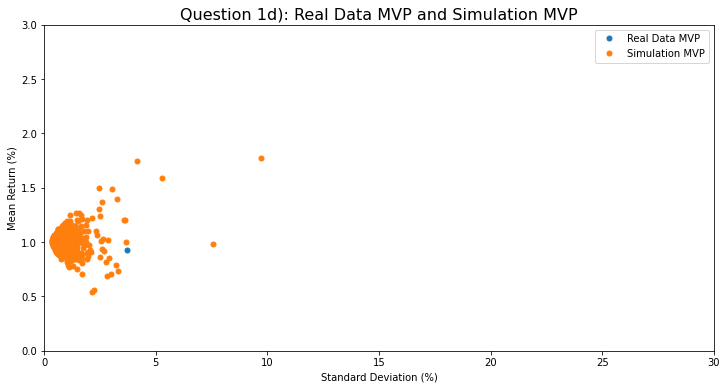

In [ ]:
sim_MVP_sds = np.asarray(sim_MVP_sds)
sim_MVP_means = np.asarray(sim_MVP_means)
sim_Tangency_means = np.asarray(sim_Tangency_means)
sim_Tangency_sds = np.asarray(sim_Tangency_sds)

#mvp_fit = np.polyfit(sim_MVP_means, sim_MVP_sds, 2)
#mvp_eq = np.poly1d(mvp_fit)

fig=plt.figure(figsize=(12,6))
plt.plot(MVP_SD, MVP_Mean,'.', markersize=10, label = 'Real Data MVP')
plt.plot(sim_MVP_sds, sim_MVP_means,'.', markersize=10, label = 'Simulation MVP')
plt.title('Question 1d): Real Data MVP and Simulation MVP', fontsize=16)
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

(0.0, 3.0)

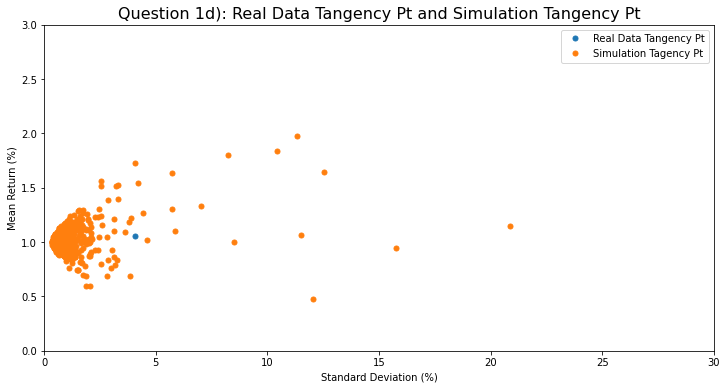

In [ ]:
#tan_fit = np.polyfit(sim_Tangency_means, sim_Tangency_sds, 1)
#tan_eq = np.poly1d(tan_fit)

#tan_x = np.linspace(-1000,1000,num = 1000)
#tan_y = tan_eq(tan_x)
fig=plt.figure(figsize=(12,6))
plt.plot(Tan_SD, Tan_Mean, '.', markersize=10, label = 'Real Data Tangency Pt')
plt.plot(sim_Tangency_sds, sim_Tangency_means, '.', markersize=10, label = 'Simulation Tagency Pt')
plt.title('Question 1d): Real Data Tangency Pt and Simulation Tangency Pt', fontsize=16)
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

•	These plots indicate the estimation error (under a normal distribution) of the Tangency and MVP weights.  Which portfolio (MVP or Tangency) is estimated with less error?  Why?

Graphically, we can see that MVP portfolio is estimated with less error as we can see that the simulation data is more clustered around the real data, while the simulation data for the Tangency portfolio are more loosely distributed in the mean-standard deviation plot.

This is because to calculate the weight of MVP, only the covariance matrix is required, while both covariance matrix and returns are required to calculate the Tangency portfolio point. Therefore, since both the covariance matrix and returns have errors, there will be compounded overall error for the portfolio, leading to larger error value comparing to the MVP point.

In [ ]:
#todo!

#### e)	
Now run some simulations under the empirical distribution of returns rather than the normal distribution.  This is called a block bootstrap simulation.

•	Draw a random sample of 10 (N) returns from the empirical distribution T times (T = the number of months) with replacement.  The way to do this is to randomly sample a particular month by selecting a number (integer) at random from 1 to T.  Pick the 10 industry returns corresponding to the month chosen randomly between 1 and T.  These 10 returns become your first data point of 10 industry returns (effectively this becomes month t=1 in the simulation).  Then, pick another number from 1 to T, even if it is the same number (this is what resampling with replacement means), and repeat.  This becomes month t=2 in the simulation.  Repeat T times and this gives you one simulation.
(Hint:  in Matlab you can create T random numbers between 1 and T and then simply pull off the rows in the industry return matrix (which is T X 10) that correspond to the T random numbers chosen.  A Matlab file is posted to help you out.)


In [ ]:
N = 10
T = 12 # the number of months
simulations = []

for _ in range(T):
  number = np.random.choice(range(1, T + 1))
  sample_month = industryReturns[industryReturns.index.month == number]
  simulations.append(sample_month.sample(n = N, replace = True))
sim_T = pd.concat(simulations)

In [ ]:
simulations[0]

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
date,,,,,,,,,,
1973-09-01,5.87,7.85,4.57,9.27,-2.80,7.67,7.43,0.79,7.90,7.19
1973-09-01,5.87,7.85,4.57,9.27,-2.80,7.67,7.43,0.79,7.90,7.19
1948-09-01,-3.95,-3.88,-2.65,-4.46,-3.17,-0.23,-0.93,-3.08,-0.91,-3.42
2007-09-01,3.76,1.60,5.40,7.80,4.20,2.11,-0.72,3.58,3.57,2.68
1932-09-01,-0.86,8.50,-2.45,-10.16,-5.60,0.24,3.06,-11.92,-4.65,-4.13
1973-09-01,5.87,7.85,4.57,9.27,-2.80,7.67,7.43,0.79,7.90,7.19
1984-09-01,1.26,-0.14,-2.50,2.11,-3.90,4.04,0.02,-4.41,4.81,2.26
1964-09-01,1.68,5.04,4.77,3.08,1.15,-1.02,3.47,2.73,1.85,4.09
1985-09-01,-0.65,-3.26,-3.93,-1.31,-4.76,-4.20,-4.31,-3.89,-5.31,-4.92


In [ ]:
sim_T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
date,,,,,,,,,,
1973-09-01,5.87,7.85,4.57,9.27,-2.80,7.67,7.43,0.79,7.90,7.19
1973-09-01,5.87,7.85,4.57,9.27,-2.80,7.67,7.43,0.79,7.90,7.19
1948-09-01,-3.95,-3.88,-2.65,-4.46,-3.17,-0.23,-0.93,-3.08,-0.91,-3.42
2007-09-01,3.76,1.60,5.40,7.80,4.20,2.11,-0.72,3.58,3.57,2.68
1932-09-01,-0.86,8.50,-2.45,-10.16,-5.60,0.24,3.06,-11.92,-4.65,-4.13
...,...,...,...,...,...,...,...,...,...,...
2014-04-01,1.22,0.27,0.79,5.67,-1.19,0.23,-0.91,-0.30,3.97,-1.55
1934-04-01,3.10,-6.85,-2.75,-1.99,-2.33,-1.25,-1.21,8.00,-3.75,-1.65
1978-04-01,6.90,9.68,11.41,6.76,13.31,2.96,10.88,9.20,0.23,9.33


•	Calculate the tangency and minimum variance portfolio weights from these simulated data.  Then, apply these weights to the actual (NOT SIMULATED) returns on the industries (e.g., the weights come from the simulated returns, but they are applied to true/actual returns on the industries).

In [ ]:
# Find mean (R) and standard deviation (SD) for each industry
sim_mean = []
sim_sd = []
for colnames in sim_T:
    sim_mean.append(sum(sim_T[colnames]) / len(sim_T[colnames]))
    sim_sd.append(np.std(sim_T[colnames], ddof = 1))

# Create matrix containing return of the simulated data (10 columns), create covariance matrix   
sim_var = np.square(sim_sd)
sim_cov = sim_T.cov()
sim_covInv = np.linalg.pinv(sim_cov.values)
sim_ones = np.transpose([1]*N)
sim_onesT = np.transpose(sim_ones)

# Minimum Variance Portfolio (MVP) weights
sim_weightMVP = np.matmul(sim_covInv, sim_ones) / np.matmul(np.matmul(sim_onesT, sim_covInv), sim_ones)

# Tangency weights V^(-1)R/(1'V^(-1)R)
sim_weightTangent = np.matmul(sim_covInv, sim_mean) / np.matmul(np.matmul(sim_onesT, sim_covInv), sim_mean)


print("simulated MVP weight:", sim_weightMVP)
print("simulated Tangency weight:",sim_weightTangent)
print("simulated MVP weight shape:",sim_weightMVP.shape)
print("transposed industry return in part(a) shape:",np.transpose(industryReturns).shape)

# Apply the weights to actual returns on the industries
sim_w_mvp_R = np.matmul(sim_weightMVP, industryMean)
sim_w_t_R = np.matmul(sim_weightTangent, industryMean)
print(sim_w_mvp_R, sim_w_t_R)

simulated MVP weight: [ 0.48267149 -0.30778924 -0.12096746  0.0950948   0.14981208  0.9820069
  0.01474073  0.06718226  0.07638834 -0.43913988]
simulated Tangency weight: [ 1.11370421 -0.47507661 -0.98458099  0.59747152  0.23731038  1.1354017
  0.82013027 -0.25335358 -0.04304439 -1.14796251]
simulated MVP weight shape: (10,)
transposed industry return in part(a) shape: (10, 1069)
0.8855820145648117 0.9001586198867841


•	Then repeat 1,000 times and save the mean and standard deviation of each MVP and Tangency portfolio you calculated under each simulation of data used to get the weights and applied to actual returns.

In [ ]:
sim_MVP_means = []
sim_MVP_sds = []
sim_Tangency_means = []
sim_Tangency_sds = []

sim_N = 1000
N = 10
T = 12 # the number of months

for i in range(sim_N):
  sim_means = []
  sim_sds = []
  simulations = []

  # simulate a portfolio
  for _ in range(T):
    number = np.random.choice(range(1, T + 1))
    sample_month = industryReturns[industryReturns.index.month == number]
    simulations.append(sample_month.sample(n = N, replace = True))
    sim_T = pd.concat(simulations)
    sim_colnames = sim_T.columns.tolist()

  # calculate mean and std dev of portfolio
  for sim_colnames in sim_T:
    sim_means.append(sum(sim_T[sim_colnames]) / len(sim_T[sim_colnames]))
    sim_sds.append(np.std(sim_T[sim_colnames], ddof = 1))

  # create matrix containing return of the simulated data (10 columns), create covariance matrix   
  sim_vars = np.square(sim_sds)
  sim_covs = sim_T.cov()
  sim_covsInv = np.linalg.pinv(sim_covs.values)
  sim_ones = np.transpose([1]*N)
  sim_onesT = np.transpose(sim_ones)

  ## MVP
  # minimum Variance Portfolio (MVP) weights
  sim_weightMVPs = np.matmul(sim_covsInv, sim_ones) / np.matmul(np.matmul(sim_onesT, sim_covsInv), sim_ones)

  # MVP standard deviation(w’*V*w) and MVP mean (w’*R). Note: V and R here are real data, not simulated!
  sim_MVP_var = np.matmul(np.matmul(np.transpose(sim_weightMVPs), industryCov.to_numpy()), sim_weightMVPs)
  sim_MVP_sd = sim_MVP_var**(1/2)
  sim_MVP_mean = np.matmul(np.transpose(sim_weightMVPs), np.array(industryMean))

  ## Tangency
  # Tangency weights
  sim_weightTangent = np.matmul(sim_covsInv, sim_means) / np.matmul(np.matmul(sim_onesT, sim_covsInv), sim_means)

  # Tangency standard deviation (w_tang’*V*w_tang) and Tangency mean (w'*R). Note: V and R here are real data, not simulated!
  sim_Tangency_var = np.matmul(np.matmul(np.transpose(sim_weightTangent), industryCov.to_numpy()), sim_weightTangent)
  sim_Tangency_sd = sim_Tangency_var**(1/2)
  sim_Tangency_mean = np.matmul(np.transpose(sim_weightTangent), np.array(industryMean))

  sim_MVP_means.append(sim_MVP_mean)
  sim_MVP_sds.append(sim_MVP_sd)
  sim_Tangency_means.append(sim_Tangency_mean)
  sim_Tangency_sds.append(sim_Tangency_sd)

•	On two separate plots of mean-standard deviation space, plot the simulated MVP and Tangency portfolios relative to the ones calculated using weights estimated from the real data.  (One plot for MVP and one for Tangency portfolios, each plot will contain 1001 data points).

(0.0, 3.0)

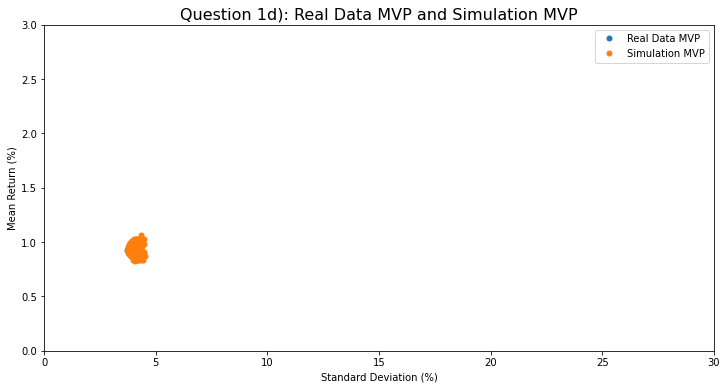

In [ ]:
sim_MVP_sds = np.asarray(sim_MVP_sds)
sim_MVP_means = np.asarray(sim_MVP_means)
sim_Tangency_means = np.asarray(sim_Tangency_means)
sim_Tangency_sds = np.asarray(sim_Tangency_sds)

#mvp_fit = np.polyfit(sim_MVP_means, sim_MVP_sds, 2)
#mvp_eq = np.poly1d(mvp_fit)

fig=plt.figure(figsize=(12,6))
plt.plot(MVP_SD, MVP_Mean,'.', markersize=10, label = 'Real Data MVP')
plt.plot(sim_MVP_sds, sim_MVP_means,'.', markersize=10, label = 'Simulation MVP')
plt.title('Question 1d): Real Data MVP and Simulation MVP', fontsize=16)
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

(0.0, 3.0)

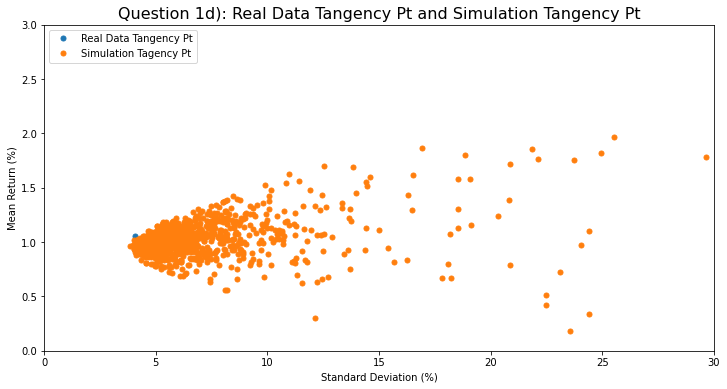

In [ ]:
#tan_fit = np.polyfit(sim_Tangency_means, sim_Tangency_sds, 1)
#tan_eq = np.poly1d(tan_fit)

#tan_x = np.linspace(-1000,1000,num = 1000)
#tan_y = tan_eq(tan_x)
fig=plt.figure(figsize=(12,6))
plt.plot(Tan_SD, Tan_Mean, '.', markersize=10, label = 'Real Data Tangency Pt')
plt.plot(sim_Tangency_sds, sim_Tangency_means, '.', markersize=10, label = 'Simulation Tagency Pt')
plt.title('Question 1d): Real Data Tangency Pt and Simulation Tangency Pt', fontsize=16)
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)');
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3)

•	These plots indicate the estimation error (under the empirical distribution) of the Tangency and MVP weights.  How does the estimation error compare under the empirical simulations versus the normal distribution simulations of question d)?

## Question 2
Solve by hand the following.  There are three securities A, B, C with mean returns of 17%, 13%, and 9%, respectively.  Furthermore, their standard deviations are 20%, 40%, and 15%, respectively.  The correlation between A and B is 0.50, between B and C is 0.30, and between A and C is zero.  The risk-free rate is 5%.



a)	Find the MVP and Tangent portfolios of these three assets, and calculate each of the portfolio return means and standard deviations.

We're given the following:

Return Vector for the three securities:

R = [0.17; 0.13; 0.09]

Variance for the three securities are:

Var_A = 0.2*0.2 = 0.04

Var_B = 0.4*0.4 = 0.16

Var_C = 0.15*0.15 = 0.0225

Covariance AB = 0.5*0.2*0.4 = 0.04

Covariance BC = 0.3*0.4*0.15 = 0.018

Covariance AC = 0

Therefore, the covariance matrix is given by:

V = [0.04, 0.04, 0; 0.04, 0.16, 0.018; 0, 0.018, 0.0225]

We can then calculate the weight for MVP and Tangency portfolios as follow (1s denotes column vector of ones):

weightMVP = V^-1*1s / (1s'*V^-1*1s) = [0.4314; -0.1003; 0.6689]
weightTangent = V^-1*(R - Rf*1s) / [1s'*V^-1*(R - Rf*1s)] = [0.6917, -0.1281, 0.4364]

Therefore, the return means and standard deviations are given by:

MVP:

MVP_mean = weightMVP'*R = 0.1205

MVP_Var = weightMVP'*V*weightMVP = 0.0132

Tangency Portfolio:

Tangent_mean = weightTangent'*R = 0.1402

Tangent_Var = weightTangent'*V*weightTangent = 0.0169


b)	Write the equation for the efficient frontier of these three assets.

We have the following two points for the efficient frontier (in the mean-standard deviation space):

MVP: (0.0132^0.5, 0.1205) = (0.1149, 0.1205)
Tangency: (0.0169^0.5, 0.1402) = (0.13, 0.1402)

Since the efficient frontier is a parabola and we know that MVP is the vertex, we can mirrow the Tangency portfolio for the 3rd point:

3rd Point: (0.13, 0.1402 - 2*(0.1402 - 0.1204)) = (0.13, 0.1006)

With these three points, we can solve for the parabola equation of x = a*y^2 + b*y + c, where x = Standard Deviation, y = Mean Return, and derive the equation of the efficient frontier as follow:

**x = 38.52*y^2 - 9.275*y + 0.673**



       x6      y6
0  0.1149  0.1205
1  0.1300  0.1402
2  0.1300  0.1006
The fit coefficients for 2b) are a = 38.5175, b = -9.2750 c = 0.6733
       2
38.52 x - 9.275 x + 0.6733


(0.0, 0.6)

<Figure size 432x288 with 0 Axes>

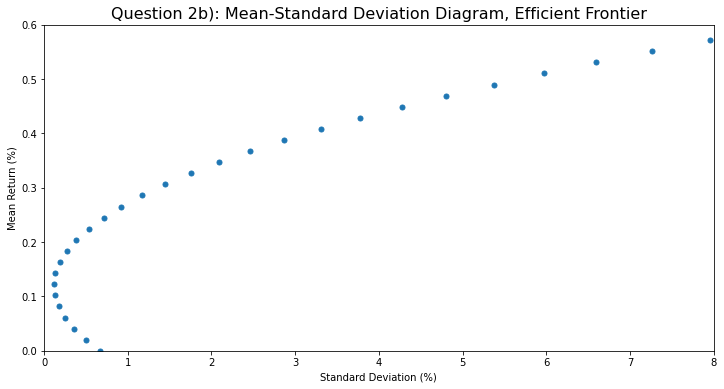

In [ ]:
df6 = pd.DataFrame({'x6':[0.1149, 0.13, 0.13], 
                  'y6':[0.1205, 0.1402, 0.1006]})
print(df6)

fit6 = np.polyfit(df6['y6'], df6['x6'], 2)
equation6 = np.poly1d(fit6)
print ("The fit coefficients for 2b) are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit6))
print (equation6)

plt.figure()
x6 = np.linspace(0, 1,num=50)
y6 = 38.52 * x6 **2 - 9.275 * x6 + 0.6733
fig=plt.figure(figsize=(12,6))
plt.plot(y6, x6, '.', markersize=10, label = 'Efficient Frontier')
plt.plot()
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean Return (%)')
plt.title('Question 2b): Mean-Standard Deviation Diagram, Efficient Frontier', fontsize=16)
plt.xlim(0, 8)
plt.ylim(0, 0.6)

c)	Find the portfolio of A, B, C that gives the lowest possible variance for a return of 13%, and find the portfolio that gives the highest possible return for a standard deviation of 15%.  Calculate the Sharpe ratios of these two portfolios.

1) We need to find the weight, w, such that:

w1'*R = 0.13 = Rp

w1'*1 = 1

w1'*V*w1 = (38.52*0.13^2 - 9.275*0.13 + 0.6733)^2 = 0.014

Therefore, we can solve for w:

w1 = V^-1*(R 1)*A^-1*(Rp; 1)

where: A = (R 1)'*V^-1*(R 1)

This gives:

w1 = [0.5569; -0.1137; 0.5569]

The Standard Deviation of this portfolio is given by: 0.014^0.5 = 0.1183

The Sharpe Ratio is given by:

**Sharpe Ratio 1 = (w1'*R - Rf) / SD = (0.13 - 0.05) / 0.1183 = 0.676**

2) With Standard Deviation = 0.15, we know that on the efficient frontier:

0.15 = 38.52R^2 - 9.275R + 0.673

The maximum return, R, that satisfies the equation is: R = 0.15

Therefore, w2 = V^-1*(R 1)*A^-1*(Rp; 1)

And this gives: w2 = [0.8209; -0.1419; 0.3209]

The Sharpe Ratio for this portfolio is given by:

**Sharpe Ratio 2 = (w2'*R - Rf) / SD = 0.667**

d)	Repeat c) allowing an investor to also invest in the riskless asset.  Find the portfolio that gives the lowest possible variance for a return of 13%, and find the portfolio that gives the highest possible return for a standard deviation of 15%.  Again, calculate the Sharpe ratios of these two portfolios.  Compare your answers to those in c).  Illustrate graphically (in a mean-standard deviation diagram) what is going on.

Since the investor is now allowed to invest in the riskless asset, the portfolio will move from the efficient frontier to the Tangency portfolio.

weight_Tangent = [0.6917; -0.1281; 0.4364]

Therefore: Rp = weight_Tangent'*R = 0.1402

Standard Deviation = w'*V*w^0.5 = 0.13

Sharpe Ratio = (Rp - Rf) / SD = (0.1402 - 0.05) / 0.13 = 0.694

Note that the optimal portfolio now lies on the Tangency line, given by:

Mean Return = 0.05 + 0.694*Standard Deviation

Therefore

1) with 13% return:

0.13 = 0.05 + 0.694*Standard Deviation

Standard Deviation = 0.1153 -> Variance = 0.0133

2) with 15% standard deviation:

Mean Return = 0.05 + 0.694*0.15 = 0.1541

Please see below for the graph.

We can see that both 

In [ ]:
weight_Tangent = [0.6917]